<a href="https://colab.research.google.com/github/aleks-haksly/Simulative/blob/main/Python/%D0%A2%D1%80%D0%B5%D1%82%D0%B8%D0%B9_%D0%BA%D0%B5%D0%B9%D1%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3 кейс

**В этом кейсе вы будете рассчитывать:**
* retention
* rolling retention
* lifetime
* churn rate
* mau
* wau
* dau

**Важно**

Перед началом решения задачи выполните следующую ячейку - в ней скачиваются нужные файлы

In [1]:
!wget https://gist.github.com/Vs8th/739269a03f2f4a7396d04d6739da3771/raw/registrations.csv

!wget https://gist.github.com/Vs8th/aacb80595d1d6aaa2e31eb735f8bc644/raw/entries.csv

!wget https://gist.github.com/Vs8th/0e827e9a608117345dd6585ab81e8c86/raw/metrics.txt

--2024-06-18 06:39:51--  https://gist.github.com/Vs8th/739269a03f2f4a7396d04d6739da3771/raw/registrations.csv
Resolving gist.github.com (gist.github.com)... 140.82.113.3
Connecting to gist.github.com (gist.github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gist.githubusercontent.com/Vs8th/739269a03f2f4a7396d04d6739da3771/raw/registrations.csv [following]
--2024-06-18 06:39:52--  https://gist.githubusercontent.com/Vs8th/739269a03f2f4a7396d04d6739da3771/raw/registrations.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14918 (15K) [text/plain]
Saving to: ‘registrations.csv’

registrations.csv   100%[===================>]  14.57K  --.-KB/s    in 0s      

2024-06-18 06:39:52 (57.2 M

Файлами для работы являются `registrations.csv` и `entries.csv`. В них хранятся данные о регистрациях пользователей и входа на платформу соответственно.

### **Посчитайте Retention 15 дня (в процентах) для пользователей, зарегистрированных в январе**

Cохраните результат в переменную `retention_15_day`

**Примечание:** результат округлите до 5 знаков после запятой

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [70]:
# Для удобства объедини данные в один dataframe
df_registrations = pd.read_csv('registrations.csv', sep=';', parse_dates=['registration_date'], index_col='user_id')
df_entries = pd.read_csv('entries.csv', sep=';', parse_dates=['entry_date'], index_col='user_id')
data = df_registrations.join(df_entries, how='left')
# Отфильтруем данные, оставив только интересующую нас январскую когорту
jan_cohort = data.query("registration_date >= '2021-01-01' and registration_date < '2021-02-01'")[:]

In [17]:
jan_cohort['15_day'] = jan_cohort["registration_date"] + pd.DateOffset(days=15) # Для кажого пользователя рассчитаем дату 15-го дня с момента регистрации
jan_cohort['active'] = (jan_cohort["entry_date"] == jan_cohort["15_day"]) # Проверяем, была ли активность пользователя в эту дату
jan_cohort.reset_index(inplace=True)
jan_cohort.drop_duplicates(subset=['user_id',	'registration_date',	'entry_date'], inplace=True) # Удаляем лишние строки чтобы не учитывать несколько раз, когда пользователть был активен больше одного раза з в одну дату.

In [18]:
result = jan_cohort.groupby('registration_date', as_index=False).agg({"user_id": "nunique", "active": "sum"})

In [19]:
retention_15_day = round(result['active'].sum() * 100 / result['user_id'].sum(), 5)
retention_15_day

54.65116

In [20]:
#@title ✏️ Проверка: чтобы проверить свое решение запустите код в этой ячейке
# Открываем файл с правильными ответами
with open('metrics.txt', 'r') as f:
    answers = f.read().split('\n')

correct_answer = float(answers[0])

try:
    assert retention_15_day == correct_answer
except AssertionError:
    print('Ответы не совпадают')
else:
    print('Поздравляем, Вы справились!')

Поздравляем, Вы справились!


### **Посчитайте Rolling-retention 30 дня (в процентах) для пользователей из той же когорты**

Сохраните результат в переменную `rolling_retention`

**Примечание:** результат округлите до 5 знаков после запятой

In [ ]:
# Ваше решение
jan_cohort['30_day'] = jan_cohort["registration_date"] + pd.DateOffset(days=30)
jan_cohort['active_2']  = (jan_cohort["entry_date"] >= jan_cohort["30_day"])
jan_cohort.drop_duplicates(subset=['user_id',	'active_2'], inplace=True)

In [ ]:
rolling_retention = round(jan_cohort['active_2'].sum() * 100 / jan_cohort['user_id'].nunique(), 5)
rolling_retention

29.06977

In [ ]:
#@title ✏️ Проверка: чтобы проверить свое решение запустите код в этой ячейке
correct_answer = float(answers[1])

try:
    assert rolling_retention == correct_answer
except AssertionError:
    print('Ответы не совпадают')
else:
    print('Поздравляем, Вы справились!')

Поздравляем, Вы справились!


### **Посчитайте Lifetime по всем пользователям, посчитанный как интеграл от n-day retention**

Сохраните результат в переменную `lifetime`

**Примечание:** результат округлите до 5 знаков после запятой

In [143]:
# Ваше решение
df_registrations = pd.read_csv('registrations.csv', sep=';', parse_dates=['registration_date'], index_col='user_id')
df_entries = pd.read_csv('entries.csv', sep=';', parse_dates=['entry_date'], index_col='user_id')
data = df_registrations.join(df_entries, how='left')
data.reset_index(inplace=True)
data.drop_duplicates(inplace=True)

In [211]:
def n_day_retention(data, n):
    df = data.copy()
    df['n_day'] = df['registration_date'] + pd.DateOffset(days=n)
    df['active'] = (df["entry_date"] == df['n_day'])
    result = df[df["entry_date"] <= df["entry_date"].max() - pd.DateOffset(days=n)].groupby('registration_date', as_index=False).agg({"user_id": "nunique", "active": "sum"})
    return result['active'].sum() / result['user_id'].sum()

In [212]:
n_day_retention(data, 1)

0.466

In [226]:
retentions = np.array([1,]+[n_day_retention(data, i) for i in range(1, 365)])

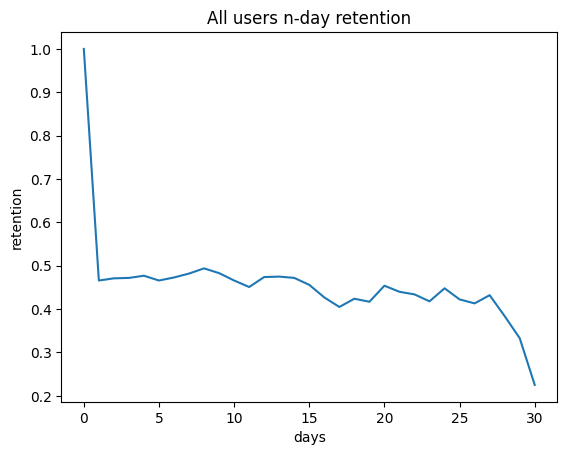

In [236]:
graph = sns.lineplot(x=range(0, len(retentions[retentions > 0])), y=retentions[retentions > 0])
graph.set(xlabel ="days", ylabel = "retention", title ='All users n-day retention');

In [232]:
from scipy.integrate import simpson
lifetime = round(simpson(retentions[retentions > 0]), 5)
lifetime

13.44057

In [233]:
from numpy import trapz
lifetime = trapz(retentions[retentions > 0])
lifetime

13.542271488982763

In [ ]:
#@title ✏️ Проверка: чтобы проверить свое решение запустите код в этой ячейке
correct_answer = float(answers[2])

try:
    assert lifetime == correct_answer
except AssertionError:
    print('Ответы не совпадают')
else:
    print('Поздравляем, Вы справились!')

### **Посчитайте Churn rate 29 дня (в долях), посчитанный по всем пользователям**

Сохраните результат в переменную `churn_29`

In [113]:
df_entries = pd.read_csv('entries.csv', sep=';', parse_dates=['entry_date'])
df_entries.drop_duplicates(inplace=True)
users_dict = df_entries.groupby('entry_date').user_id.apply(list).to_dict()
df_entries
df_entries['flag'] = np.vectorize(lambda x, y: x in users_dict.get(pd.Timestamp(y), []))(df_entries['user_id'], df_entries['entry_date']- pd.DateOffset(days=29))


In [134]:
test = df_entries.groupby('entry_date', as_index=False).agg({'flag': 'sum', 'user_id': 'count'})
test_filtered = test.query("entry_date >= '2021-01-30'")

In [139]:
test_filtered


,entry_date,flag,user_id
29,2021-01-30,24,41
30,2021-01-31,20,42
31,2021-02-01,0,18
32,2021-02-02,0,17
33,2021-02-03,0,22
...,...,...,...
360,2021-12-27,0,52
361,2021-12-28,0,44
362,2021-12-29,0,38
363,2021-12-30,26,46


In [127]:
(test['user_id'].sum() - test['flag'].sum()) / test['user_id'].sum()

0.9676438800324236

In [72]:
data['day_29'] = data['registration_date'] + pd.DateOffset(days=29)
data['active_29'] = (data['entry_date'] == data['day_29'])
data = data.query("day_29 <= '2021-12-31'")

In [73]:
# Ваше решение
data

,user_id,registration_date,entry_date,day_29,active_29
0,1,2021-01-01,2021-01-01,2021-01-30,False
1,1,2021-01-01,2021-01-03,2021-01-30,False
2,1,2021-01-01,2021-01-04,2021-01-30,False
3,1,2021-01-01,2021-01-05,2021-01-30,False
4,1,2021-01-01,2021-01-07,2021-01-30,False
...,...,...,...,...,...
1904,962,2021-12-02,2021-12-15,2021-12-31,False
1905,962,2021-12-02,2021-12-18,2021-12-31,False
1906,962,2021-12-02,2021-12-31,2021-12-31,True
1907,964,2021-12-02,2021-12-06,2021-12-31,False


In [128]:
result = data.groupby('entry_date', as_index=False).agg({"user_id": "nunique", "active_29": "sum"})

In [129]:
result

,entry_date,user_id,active_29
0,2021-01-01,1,0
1,2021-01-02,2,0
2,2021-01-03,3,0
3,2021-01-04,4,0
4,2021-01-05,4,0
...,...,...,...
360,2021-12-27,2,0
361,2021-12-28,2,0
362,2021-12-29,2,0
363,2021-12-30,2,1


In [77]:
(result.user_id.sum() - result.active_29.sum()) / result.user_id.sum()

0.9225806451612903

In [ ]:
#@title ✏️ Проверка: чтобы проверить свое решение запустите код в этой ячейке
correct_answer = float(answers[3])

try:
    assert churn_29 == correct_answer
except AssertionError:
    print('Ответы не совпадают')
else:
    print('Поздравляем, Вы справились!')

### **Посчитайте Mau, Wau, Dau за последний месяц/неделю/день записей**

Сохраните результат в переменные `dec_mau`, `dec_wau`, `dec_dau` соответственно

**Примечание:** последний месяц записей - декабрь. Поэтому `mau` рассчитываем для декабря (2021 года), для `wau` берем последнюю неделю - с 25 по 31 декабря, и для `dau` соответственно последний день - 31 декабря.

In [23]:
# Ваше решение
df_entries = pd.read_csv('entries.csv', sep=';', parse_dates=['entry_date'])

In [13]:
dec_mau = df_entries[df_entries['entry_date'] > (df_entries.entry_date.max() - pd.DateOffset(months=1))].user_id.nunique()

In [21]:
#@title ✏️ Проверка: чтобы проверить свое решение запустите код в этой ячейке
correct_answer = float(answers[4])

try:
    assert dec_mau == correct_answer
except AssertionError:
    print('Ответы не совпадают')
else:
    print('Поздравляем, Вы справились!')

Поздравляем, Вы справились!


In [24]:
# Ваше решение
dec_wau = df_entries[df_entries['entry_date'] > (df_entries.entry_date.max() - pd.DateOffset(weeks=1))].user_id.nunique()

In [25]:
#@title ✏️ Проверка: чтобы проверить свое решение запустите код в этой ячейке
correct_answer = float(answers[5])

try:
    assert dec_wau == correct_answer
except AssertionError:
    print('Ответы не совпадают')
else:
    print('Поздравляем, Вы справились!')

Поздравляем, Вы справились!


In [26]:
# Ваше решение
dec_dau = df_entries[df_entries['entry_date'] > (df_entries.entry_date.max() - pd.DateOffset(days=1))].user_id.nunique()

In [27]:
#@title ✏️ Проверка: чтобы проверить свое решение запустите код в этой ячейке
correct_answer = float(answers[6])

try:
    assert dec_dau == correct_answer
except AssertionError:
    print('Ответы не совпадают')
else:
    print('Поздравляем, Вы справились!')

Поздравляем, Вы справились!


### **Посчитайте Mau, Wau, Dau усредненные**

Сохраните результат в переменные `avg_mau`, `avg_wau`, `avg_dau` соответственно

**Примечание:** результаты округлите до 5 знаков после запятой

In [44]:
# Ваше решение
avg_mau = round(df_entries.groupby(df_entries.entry_date.dt.month).user_id.nunique().mean(), 5)

In [45]:
#@title ✏️ Проверка: чтобы проверить свое решение запустите код в этой ячейке
correct_answer = float(answers[7])

try:
    assert avg_mau == correct_answer
except AssertionError:
    print('Ответы не совпадают')
else:
    print('Поздравляем, Вы справились!')

Поздравляем, Вы справились!


In [54]:
# Ваше решение
avg_wau = round(df_entries.resample('W-SUN', on='entry_date').user_id.nunique().mean(), 5)

In [55]:
#@title ✏️ Проверка: чтобы проверить свое решение запустите код в этой ячейке
correct_answer = float(answers[8])

try:
    assert avg_wau == correct_answer
except AssertionError:
    print('Ответы не совпадают')
else:
    print('Поздравляем, Вы справились!')

Поздравляем, Вы справились!


In [49]:
# Ваше решение
avg_dau = round(df_entries.groupby(df_entries.entry_date.dt.date).user_id.nunique().mean(), 5)

40.5589

In [50]:
#@title ✏️ Проверка: чтобы проверить свое решение запустите код в этой ячейке
correct_answer = float(answers[9])

try:
    assert avg_dau == correct_answer
except AssertionError:
    print('Ответы не совпадают')
else:
    print('Поздравляем, Вы справились!')

Поздравляем, Вы справились!
